# Δεύτερη Εργασία
## Η Στήλη της Ροζέτας του Ανθρώπινου Κεφαλαίου
---
> Λάζαρος Πανιτσίδης <br/>
> lazarospanitsidis@outlook.com

### Ε1: Εισόδημα και Αποτελέσματα των Τεστ

In [47]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats as stats
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

In [49]:
country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx', sheet_name="Country Scores")
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


In [50]:
country_scores.isna().sum()

Country                                                  0
Country Code                                             0
Percent Above Math Benchmark (400 on TIMSS Scale)        8
Percent Above Reading Benchmark (400 on PIRLS Scale)    12
Median Math Score (TIMSS Scale, 4th Grade)               7
Median Reading Score (PIRLS Scale, 4th Grade)           10
dtype: int64

* Οι τιμές NaΝ διώχνονται με τη μέθοδο dropna(), καθώς οι χώρες δεν σχετίζονται μεταξύ τους ώστε να συμπληρωθούν οι τιμές.

In [51]:
country_scores = country_scores.dropna()
country_scores = country_scores[['Country', 'Median Math Score (TIMSS Scale, 4th Grade)','Median Reading Score (PIRLS Scale, 4th Grade)']]
country_scores.head()

,Country,"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,437.000000,440.000000
1,Argentina,406.652557,431.443542
3,Australia,520.000000,534.000000
4,Austria,511.000000,533.000000
5,Azerbaijan,465.000000,467.000000


In [52]:
wdi = pd.read_csv("WDI_data.csv")
wdi

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [53]:
wdi.isna().sum()

Country Name     3
Country Code     5
Series Name      5
Series Code      5
2015 [YR2015]    5
dtype: int64

* Παρατηρείται ότι οι μόνες NaN τιμές που υπάρχουν , είναι αυτές των τελευταίων 5 γραμμών , οι οποίες δεν έχουν κάποια χρήσιμη πληροφορία.

In [54]:
wdi = wdi.dropna()
wdi

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


* Επιλέγονται μόνο οι γραμμές που περιέχουν την πληροφορία για το κατά κεφαλήν εισόδημα.

In [55]:
wdi_gdp = wdi[wdi["Series Name"] == "GDP per capita, PPP (constant 2011 international $)"]
wdi_gdp

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


* Δεν υπήρξε κάποιο σφάλμα κατά την επιλογή αυτών των γραμμών, καθώς η κάθε χώρα είχε 3 "γραμμές πληροφορίας" και επιλέχτηκε η 1 από τις 3. Άρα 792/3 = 264.

In [56]:
wdi_gdp = wdi_gdp[['Country Name','2015 [YR2015]']]
wdi_gdp.rename(columns={'Country Name': 'Country', '2015 [YR2015]': 'GDP'}, inplace=True)
wdi_gdp

,Country,GDP
0,Afghanistan,1809.01648820483
3,Albania,10971.2925173789
6,Algeria,13724.723852895
9,American Samoa,..
12,Andorra,..
...,...,...
777,West Bank and Gaza,4339.10369305975
780,World,14766.537605517
783,"Yemen, Rep.",2641.04582911357
786,Zambia,3627.20204093772


In [57]:
wdi_gdp.dtypes

Country    object
GDP        object
dtype: object

* Παρατηρήθηκε ότι μέσα στις τιμές του GDP , υπήρχε και η συμβολοσειρά ".." , οπότε μετατρέπεται σε NaN. Έπειτα οι τιμές της στήλης GDP μετατρέπονται σε float και οι τιμές NaN συμπληρώνονται από τον μέσο όρο της στήλης. Τέλος φτιάχνεται μια νέα στήλη με τον λογάριθμο του κατα κεφαλήν εισοδήματος.

In [58]:
wdi_gdp['GDP'][wdi_gdp['GDP'] == ".."] = np.nan
wdi_gdp['GDP'] = wdi_gdp['GDP'].astype("float")
wdi_gdp.dropna(inplace=True)
wdi_gdp['log_GDP'] = np.log(wdi_gdp['GDP'])
wdi_gdp

,Country,GDP,log_GDP
0,Afghanistan,1809.016488,7.500539
3,Albania,10971.292517,9.303037
6,Algeria,13724.723853,9.526954
15,Angola,6231.067992,8.737303
18,Antigua and Barbuda,20154.947488,9.911205
...,...,...,...
777,West Bank and Gaza,4339.103693,8.375423
780,World,14766.537606,9.600119
783,"Yemen, Rep.",2641.045829,7.878930
786,Zambia,3627.202041,8.196217


* Φτιάχνεται ένα κοινό dataframe που εμπεριέχει όλα όσα χρειάζονται για τα γραφήματα.

In [59]:
df = country_scores.set_index('Country').join(wdi_gdp.set_index('Country'))
df.head()

,"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",GDP,log_GDP
Country,,,,
U.A.E.,437.000000,440.000000,NaN,NaN
Argentina,406.652557,431.443542,19101.297392,9.857512
Australia,520.000000,534.000000,43719.502165,10.685550
Austria,511.000000,533.000000,44353.875214,10.699955
Azerbaijan,465.000000,467.000000,16698.863653,9.723096


In [60]:
df=df.dropna()
df.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMSS', 'Median Reading Score (PIRLS Scale, 4th Grade)': 'PIRLS'}, inplace=True)
df.head()

,TIMSS,PIRLS,GDP,log_GDP
Country,,,,
Argentina,406.652557,431.443542,19101.297392,9.857512
Australia,520.000000,534.000000,43719.502165,10.685550
Austria,511.000000,533.000000,44353.875214,10.699955
Azerbaijan,465.000000,467.000000,16698.863653,9.723096
Burundi,476.978455,392.374207,748.415271,6.617958


* Για μεγαλύτερη ευχρηστία , φτιάχνεται ένα dataframe για το TIMSS και ένα για το PIRLS.

In [61]:
timss = df[['TIMSS' ,'log_GDP']]
timss.head()

,TIMSS,log_GDP
Country,,
Argentina,406.652557,9.857512
Australia,520.000000,10.685550
Austria,511.000000,10.699955
Azerbaijan,465.000000,9.723096
Burundi,476.978455,6.617958


In [62]:
pirls = df[['PIRLS' ,'log_GDP']]
pirls.head()

,PIRLS,log_GDP
Country,,
Argentina,431.443542,9.857512
Australia,534.000000,10.685550
Austria,533.000000,10.699955
Azerbaijan,467.000000,9.723096
Burundi,392.374207,6.617958


* Ο συντελεστής Pearson δείχνει αν υπάρχει κάποια ένδειξη για γραμμική συσχέτιση μεταξύ του log GDP και του TIMSS score.

In [63]:
pearsonr_timss = stats.pearsonr(x=timss['log_GDP'], y=timss['TIMSS'])
pearsonr_timss

(0.6271828261897813, 3.8819128759804623e-07)

* Ορίζεται ένα μοντέλο με βάση τον κατάλληλο μαθηματικό τύπο.

* Στη συνέχεια εφαρμόζεται το μοντέλο στα δεδομένα καλώντας τη μέθοδο `fit()`.

* Η ιδιότητα `params` των αποτελεσμάτων δίνει την *τεταγμένη* (intercept) και την *κλήση* (slope) της γραμμής παλινδρόμησης.

In [64]:
timss_mod = smf.ols("TIMSS ~ log_GDP", data=timss)
timss_res = timss_mod.fit()
timss_res.params

Intercept    76.537377
log_GDP      38.626912
dtype: float64

* Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής `TIMSS score` ($y$) και του `log GDP` ($x$) είναι:

$$ y = 76{,}537377 + 38{,}626912 x $$

In [65]:
timss_res.rsquared

0.39335829746740103

* To $R^2$ είναι μια μετρική *καλής προσαρμογής* (goodness of fit), δηλαδή υποδεικνύει πόσο καλά ταιριάζουν τα δεδομένα στο μοντέλο.

* Η τιμή $R^2 = 0{,}393$ που φαίνεται σημαίνει ότι το μοντέλο εξηγεί το 39,3% της διακύμανσης (variation) του TIMSS score με βάση το log GDP.

* Εφαρμόζεται η ίδια διαδικασία και για το PIRLS score.

In [66]:
pearsonr_pirls = stats.pearsonr(x=pirls['log_GDP'], y=pirls['PIRLS'])
pearsonr_pirls

(0.7453032745663417, 1.0198739604707986e-10)

In [67]:
pirls_mod = smf.ols("PIRLS ~ log_GDP", data=pirls)
pirls_res = pirls_mod.fit()
pirls_res.params

Intercept    39.177881
log_GDP      44.682098
dtype: float64

* Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής `PIRLS score` ($y$) και του `log GDP` ($x$) είναι:

$$ y = 39{,}177881 + 44{,}682098 x $$

In [68]:
pirls_res.rsquared

0.5554769710793115

* Η τιμή $R^2 = 0{,}555$ που φαίνεται σημαίνει ότι το μοντέλο εξηγεί το 55,5% της διακύμανσης (variation) του PIRLS score με βάση το log GDP.

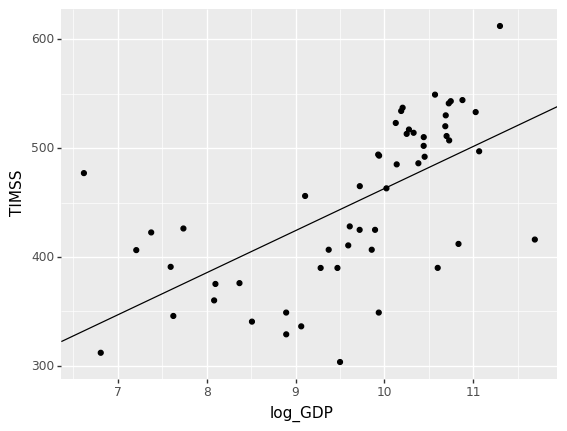

<ggplot: (91656006783)>

In [69]:
ggplot(data=timss) +\
    geom_point(mapping=aes(x='log_GDP', y='TIMSS')) +\
    geom_abline(intercept=timss_res.params['Intercept'], 
                slope=timss_res.params['log_GDP'])

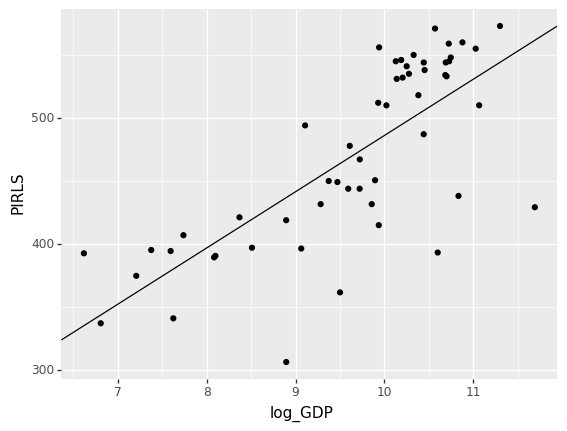

<ggplot: (91655859600)>

In [70]:
ggplot(data=pirls) +\
    geom_point(mapping=aes(x='log_GDP', y='PIRLS')) +\
    geom_abline(intercept=pirls_res.params['Intercept'], 
                slope=pirls_res.params['log_GDP'])

### E2: Χρόνια Εκπαίδευσης και Αποτελέσματα στα Τεστ

* Υπολογίζονται τα υπόλοιπα των μοντέλων του Ε1 για τα TIMSS και PIRLS.

In [71]:
timss['TIMSS_resid'] = timss_res.resid
timss.head()

,TIMSS,log_GDP,TIMSS_resid
Country,,,
Argentina,406.652557,9.857512,-50.650052
Australia,520.000000,10.685550,30.712839
Austria,511.000000,10.699955,21.156387
Azerbaijan,465.000000,9.723096,12.889450
Burundi,476.978455,6.617958,144.809795


In [72]:
pirls['PIRLS_resid'] = pirls_res.resid
pirls.head()

,PIRLS,log_GDP,PIRLS_resid
Country,,,
Argentina,431.443542,9.857512,-48.188632
Australia,534.000000,10.685550,17.369350
Austria,533.000000,10.699955,15.725668
Azerbaijan,467.000000,9.723096,-6.626204
Burundi,392.374207,6.617958,57.492080


* Από το αρχείο των ετών εκπαίδευσης , επιλέγονται οι τιμές για το 2010.

In [73]:
education=pd.read_stata("BL2013_MF1599_v2.2.dta")
education = education[education["year"] == 2010.0]
education = education[['country' ,'yr_sch']]
education.rename(columns={'country': 'Country', 'yr_sch': 'Years_of_Schooling'}, inplace=True)
education

,Country,Years_of_Schooling
12,Algeria,6.678049
25,Benin,4.430164
38,Botswana,9.554915
51,Burundi,3.346481
64,Cameroon,6.154877
...,...,...
1845,Republic of Moldova,10.404020
1858,Serbia,10.845333
1871,Slovenia,11.890487
1884,"China, Macao Special Administrative Region",8.543072


In [74]:
education.isna().sum()

Country               0
Years_of_Schooling    0
dtype: int64

In [75]:
df_2 = education.set_index('Country').join(wdi_gdp.set_index('Country'))
df_2 = df_2[['Years_of_Schooling' , 'log_GDP']]
df_2 = df_2.dropna()

In [76]:
pearsonr_edu = stats.pearsonr(x=df_2['log_GDP'], y=df_2['Years_of_Schooling'])
pearsonr_edu

(0.7784081436113978, 5.047375716298766e-26)

* Ορίζεται ένα μοντέλο με μεταβλητές το λογαριθμισμένο κατά κεφαλήν εισόδημα το 2015 και τα χρόνια εκπαίδευσης.

In [77]:
edu_mod = smf.ols("Years_of_Schooling ~ log_GDP", data=df_2)
edu_res = edu_mod.fit()
edu_res.params

Intercept   -8.338686
log_GDP      1.787335
dtype: float64

* Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής `Years of Schooling` ($y$) και του `log GDP` ($x$) είναι:

$$ y = -8{,}338686 + 1{,}787335 x $$

In [78]:
edu_res.rsquared

0.6059192380405424

* Η τιμή $R^2 = 0{,}6059$ που φαίνεται σημαίνει ότι το μοντέλο εξηγεί το 60,59% της διακύμανσης (variation) των χρόνων εκπαίδευσης με βάση το log GDP.

* Υπολογίζονται τα υπόλοιπα για τα χρόνια εκπαίδευσης.

In [79]:
df_2['Years_of_Schooling_resid'] = edu_res.resid
df_2 = df_2[['Years_of_Schooling_resid']]

* Φτιάχνεται ένα dataframe για το TIMSS και ένα για το PIRLS με τα υπόλοιπά τους.

In [80]:
timss_resid = df_2.join(timss)
timss_resid = timss_resid[['Years_of_Schooling_resid' , 'TIMSS_resid']]
timss_resid.dropna(inplace=True)
timss_resid.head()

,Years_of_Schooling_resid,TIMSS_resid
Country,,
Benin,-0.805007,21.061065
Burundi,-0.143344,144.809795
Cameroon,0.019080,-14.111480
Morocco,-2.599783,-91.131857
Niger,-1.951785,-27.411733


In [81]:
pirls_resid = df_2.join(pirls)
pirls_resid = pirls_resid[['Years_of_Schooling_resid' , 'PIRLS_resid']]
pirls_resid.dropna(inplace=True)
pirls_resid.head()

,Years_of_Schooling_resid,PIRLS_resid
Country,,
Benin,-0.805007,15.682162
Burundi,-0.143344,57.492080
Cameroon,0.019080,-10.685531
Morocco,-2.599783,-130.634505
Niger,-1.951785,-6.571531


In [82]:
pearsonr_timss_resid = stats.pearsonr(x=timss_resid['Years_of_Schooling_resid'], y=timss_resid['TIMSS_resid'])
pearsonr_timss_resid

(0.43060871461871275, 0.003149854039752841)

In [83]:
timss_resid_mod = smf.ols("TIMSS_resid ~ Years_of_Schooling_resid", data=timss_resid)
timss_resid_res = timss_resid_mod.fit()
timss_resid_res.params

Intercept                    5.402008
Years_of_Schooling_resid    16.761844
dtype: float64

* Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής `TIMSS residuals` ($y$) και του `Years of Schooling residuals` ($x$) είναι:

$$ y = 5{,}402008 + 16{,}761844 x $$

In [84]:
timss_resid_res.rsquared

0.18542386510557973

* Η τιμή $R^2 = 0{,}1854$ που φαίνεται σημαίνει ότι το μοντέλο εξηγεί το 18,54% της διακύμανσης (variation) των υπολοίπων του σκορ TIMSS με βάση τα χρόνια εκπαίδευσης.

In [85]:
pearsonr_pirls_resid = stats.pearsonr(x=pirls_resid['Years_of_Schooling_resid'], y=pirls_resid['PIRLS_resid'])
pearsonr_pirls_resid

(0.5820566145884757, 2.7404197663931664e-05)

In [86]:
pirls_resid_mod = smf.ols("PIRLS_resid ~ Years_of_Schooling_resid", data=pirls_resid)
pirls_resid_res = pirls_resid_mod.fit()
pirls_resid_res.params

Intercept                    6.273276
Years_of_Schooling_resid    18.295631
dtype: float64

* Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής `PIRLS residuals` ($y$) και του `Years of Schooling residuals` ($x$) είναι:

$$ y = 6{,}273276 + 18{,}295631 x $$

In [87]:
pirls_resid_res.rsquared

0.3387899025861971

* Η τιμή $R^2 = 0{,}3387$ που φαίνεται σημαίνει ότι το μοντέλο εξηγεί το 33,87% της διακύμανσης (variation) των υπολοίπων του σκορ PIRLS με βάση τα χρόνια εκπαίδευσης.

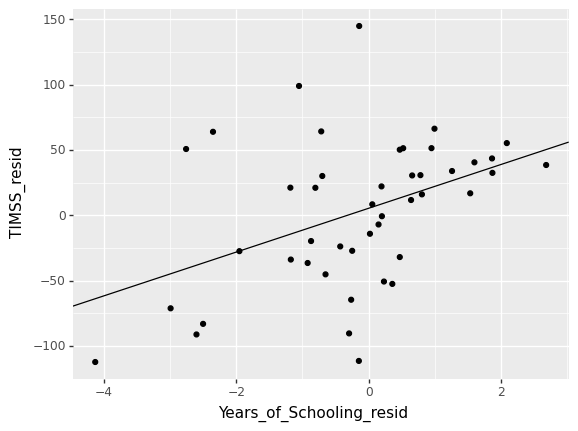

<ggplot: (91656096306)>

In [88]:
ggplot(data=timss_resid) +\
    geom_point(mapping=aes(x='Years_of_Schooling_resid', y='TIMSS_resid')) +\
    geom_abline(intercept=timss_resid_res.params['Intercept'], 
                slope=timss_resid_res.params['Years_of_Schooling_resid'])

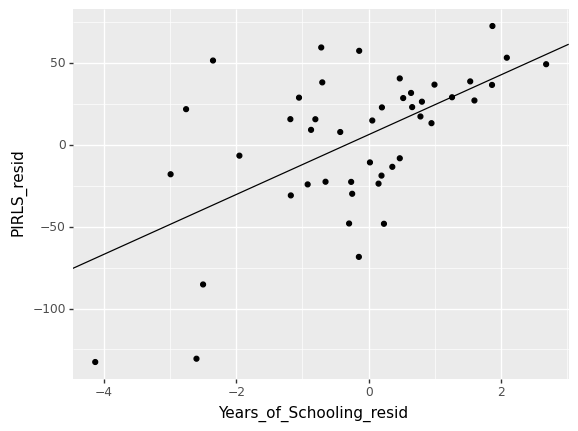

<ggplot: (91656135332)>

In [89]:
ggplot(data=pirls_resid) +\
    geom_point(mapping=aes(x='Years_of_Schooling_resid', y='PIRLS_resid')) +\
    geom_abline(intercept=pirls_resid_res.params['Intercept'], 
                slope=pirls_resid_res.params['Years_of_Schooling_resid'])